In [1]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [32]:
left = []
right = []

with open('motion_gui_logs_rachel_1.pickle', 'rb') as f:
    file = pickle.load(f)
    
    event_array = file['EVENT_LOG']
    signal_array = file['DATA_LOG']

    j = 0
    for i in range(len(event_array)-1):
        
        event_data = vars(event_array[i])
        next_event_data = vars(event_array[i+1])
        
        # array to store signal_array
        event_signal = np.array([])
        
        # loop through signal array. While timestamp is less than timestamp
        # of the next event, add it to the current event signal
        while signal_array[j]['time'] <= next_event_data['timestamp']:
            event_signal = np.concatenate((event_signal, signal_array[j]['data'][:8]), axis=1) \
                if event_signal.size else signal_array[j]['data'][:8]
            j += 1
            
        # add it to either left or right data
        if event_signal.size == 0:
            continue
  
        if event_data['task'] == 'LEFT':
            left.append(event_signal)
                
        elif event_data['task'] == 'RIGHT':
            right.append(event_signal)
                
    # add remaining


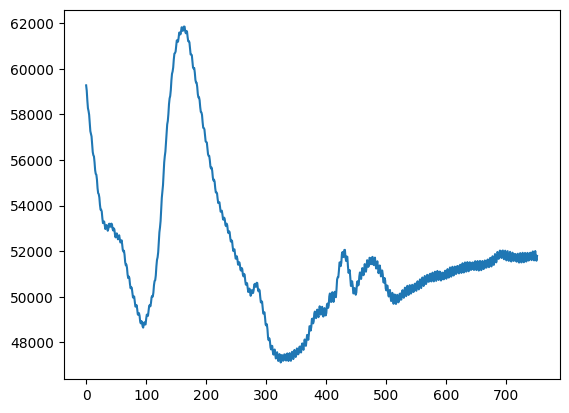

In [46]:
plt.plot(left[0][3])